In [1]:
!python3 --version

Python 3.8.11


In [2]:
import pandas

from utils import calculate_percent_replicating_MOA, calculate_percent_matching_MOA, calculate_percent_replicating_across_plates_MOA, plot_simple_comparison, plot_two_comparisons

In [3]:
variable = 'Clone type'

experiment_dict = {
    'A549':{
        'Parental':{
            'Lower':['BR00117105','BR00117106','BR00117107'],
            'Higher':['BR00117108']},
        'Polyclonal':{
            'Lower':['BR00117097'],
            'Higher':['BR00117098']},
        'Monoclonal 1':{
            'Lower':['BR00117100'],
            'Higher':['BR00117099']},
        'Monoclonal 2':{
            'Lower':['BR00117104'],
            'Higher':['BR00117101']},
        'Monoclonal 3':{
            'Lower':['BR00117110'],
            'Higher':['BR00117109']}
            },
    'U2OS':{
        'Parental':{
            'Lower':['BR00117093','BR00117094','BR00117095'],
            'Higher':['BR00117096']},
        'Polyclonal':{
            'Lower':['BR00117088'],
            'Higher':['BR00117089']},
        'Monoclonal 1':{
            'Lower':['BR00117091'],
            'Higher':['BR00117092']}
            }     
    }


In [4]:
plate_df = pandas.DataFrame()


for eachline in list(experiment_dict.keys()):
    for eachclonetype in list(experiment_dict[eachline].keys()):
        for eachdensity in list(experiment_dict[eachline][eachclonetype].keys()):
            for eachplate in experiment_dict[eachline][eachclonetype][eachdensity]:
                if eachplate in ['BR00117095','BR00117096']:
                    platepath = '../profiles-pilots/profiles/2020_10_20_Cell1_restainedReimaged'
                else:
                    platepath = '../profiles-pilots/profiles/2020_10_02_RestainedCell1'
                plate_df = plate_df.append({'Plate Name' : eachplate, variable : eachclonetype, 
                'Density' : eachdensity, 'Cell Type': eachline,
                'Percent Replicating' : calculate_percent_replicating_MOA(platepath,eachplate),
                'Percent Matching' : calculate_percent_matching_MOA(platepath,eachplate)}, ignore_index=True)


/usr/local/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


/usr/local/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level


Saved to ../figures/Clone type-Percent Replicating-Density-Cell Type-None.png


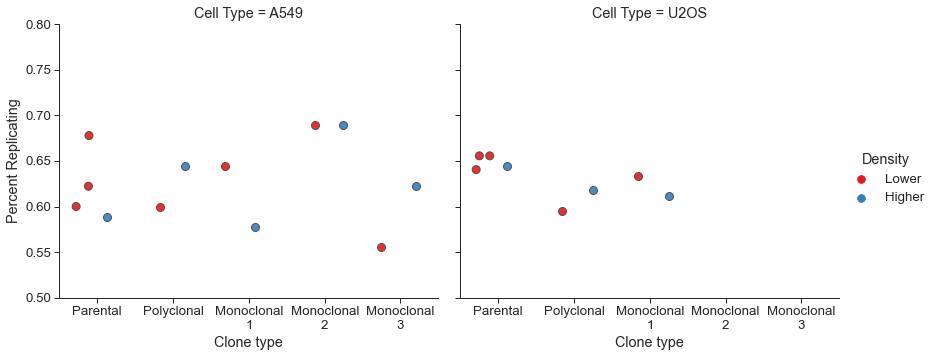

In [5]:
#You may find that running this a couple of times is needed to find a version where the jitter is about right
plot_simple_comparison(df=plate_df,x=variable,hue='Density',col='Cell Type',aspect=1.2)

/usr/local/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level


Saved to ../figures/Clone type-Percent Matching-Density-Cell Type-None.png


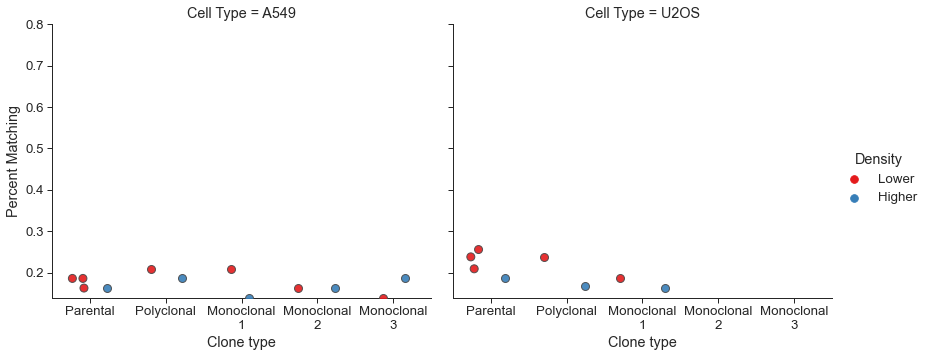

In [6]:
plot_simple_comparison(df=plate_df,x=variable,y='Percent Matching',hue='Density',col='Cell Type',aspect=1.2)

Saved to ../figures/Percent Replicating-Percent Matching-Clone type-Cell Type-None-Density.png


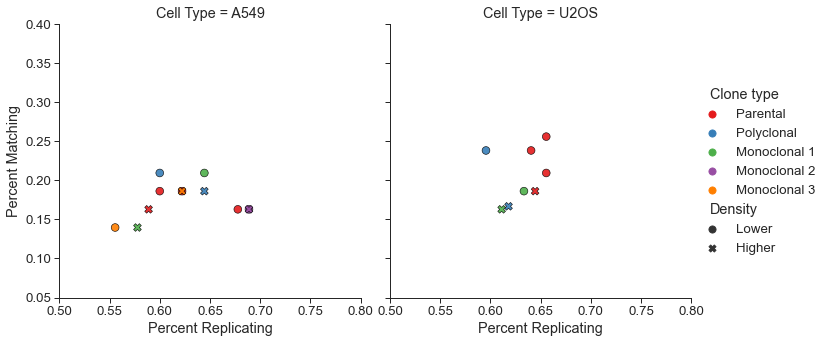

In [7]:
import matplotlib.pyplot as plt
plt.rcParams["legend.markerscale"] =1.5
plot_two_comparisons(df=plate_df,hue=variable,col='Cell Type',style='Density')

In [8]:
plate_match_df = pandas.DataFrame()

comparison_list = []

for eachline in list(experiment_dict.keys()):
    for eachclonetype1 in list(experiment_dict[eachline].keys()):
        for eachclonetype2 in list(experiment_dict[eachline].keys()):
            for eachdensity1 in list(experiment_dict[eachline][eachclonetype1].keys()):
                for eachdensity2 in list(experiment_dict[eachline][eachclonetype2].keys()):
                    string1 = f"{eachline}-{eachclonetype1}-{eachdensity1}"
                    string2 = f"{eachline}-{eachclonetype2}-{eachdensity2}"
                    if string1 != string2:
                        if f"{string1}-{string2}" not in comparison_list:
                            if f"{string2}-{string1}" not in comparison_list:
                                comparison_list.append(f"{string1}-{string2}")
                                for eachplate1 in experiment_dict[eachline][eachclonetype1][eachdensity1]:
                                    if eachplate1 in ['BR00117095','BR00117096']:
                                        platepath1 = '../profiles-pilots/profiles/2020_10_20_Cell1_restainedReimaged'
                                    else:
                                        platepath1 = '../profiles-pilots/profiles/2020_10_02_RestainedCell1'
                                    for eachplate2 in experiment_dict[eachline][eachclonetype2][eachdensity2]:
                                        if eachplate2 in ['BR00117095','BR00117096']:
                                            platepath2 = '../profiles-pilots/profiles/2020_10_20_Cell1_restainedReimaged'
                                        else:
                                            platepath2 = '../profiles-pilots/profiles/2020_10_02_RestainedCell1'                                    
                                        plate_match_df = plate_match_df.append({'Percent Replicating' : 
                                        calculate_percent_replicating_across_plates_MOA(
                                            platepath1,eachplate1,platepath2,eachplate2),
                                        'Density':f'{eachdensity1}-{eachdensity2}', 
                                        variable:f'{eachclonetype1}-{eachclonetype2}',
                                        'Cell Type':eachline}, ignore_index=True)

KeyboardInterrupt: 

In [ ]:
plot_simple_comparison(df=plate_match_df,x=variable,hue='Density',row='Cell Type')

In [ ]:
plate_df.to_csv('checkpoint_csvs/AssessPolyclonesMonoclones-Replicating.csv',index=False)
plate_match_df.to_csv('checkpoint_csvs/AssessPolyclonesMonoclones-Matching.csv',index=False)

In [ ]:
plate_match_df = pandas.read_csv('checkpoint_csvs/AssessPolyclonesMonoclones-Matching.csv')

In [ ]:
import textwrap
import seaborn as sns
def plot_simple_comparisons(df,x,hue,y='Percent Replicating',order=None,hue_order=None,
col=None, col_order=None, col_wrap=None,row=None,row_order=None,jitter=0.25,dodge=True,plotname=None,
ylim=None, title=None):
    sns.set_style("ticks")
    sns.set_context("paper",font_scale=1.5)
    g = sns.catplot(data=df, x = x ,y = y, order=order,
    hue=hue, hue_order=hue_order, col=col, col_order = col_order, col_wrap=col_wrap,row=row,
    row_order = row_order, palette='Set1',s=8,linewidth=1,jitter=jitter,
    alpha=0.9,dodge=dodge,aspect=2)
    labels = []
    if not order:
        orig_labels = list(dict.fromkeys(df[x].values).keys())
    else:
        orig_labels = order
    for label in orig_labels:
        if type(label)!= str:
            label = str(int(label))
        labels.append(textwrap.fill(label, width=45/len(orig_labels),break_long_words=False))
    g.set_xticklabels(labels=labels,rotation=0)
    if ylim:
        ymin,ymax=ylim
    else:
        ymin = 0.5
        ymax = 0.8 
    if df[y].min()<ymin:
        ymin = df[y].min()
    if df[y].max()>ymax:
        ymax = df[y].max()
    g.set(ylim=([ymin,ymax]))    
    if plotname:
        plotname = f"../figures/{plotname}"
    else:
        plotname = f"../figures/{x}-{y}-{hue}-{col}-{row}.png"

    g.savefig(plotname,dpi=300)
    print(f'Saved to {plotname}')

order=['Parental-Parental','Parental-Polyclonal','Parental-Monoclonal 1', 
'Parental-Monoclonal 2', 'Parental-Monoclonal 3', 'Polyclonal-Polyclonal','Polyclonal-Monoclonal 1', 
'Polyclonal-Monoclonal 2', 'Polyclonal-Monoclonal 3']
plot_simple_comparisons(df=plate_match_df,x=variable,order=order,hue='Density',row='Cell Type',title=' ')